In [0]:
from __future__ import absolute_import, division, print_function 

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


In [0]:
import numpy as npn

### 학습 데이터 셋업 

In [11]:
celsius_q = np.array([-40,-10,0,8, 15, 22 , 38], dtype = float)

fahrenheit_a = np.array([40, 14, 32, 46, 59, 72, 100], dtype = float)

for i,c in enumerate(celsius_q):
  print("{} 섭씨온도는 = {} 화씨온도".format(c, fahrenheit_a[i]))

-40.0 섭씨온도는 = 40.0 화씨온도
-10.0 섭씨온도는 = 14.0 화씨온도
0.0 섭씨온도는 = 32.0 화씨온도
8.0 섭씨온도는 = 46.0 화씨온도
15.0 섭씨온도는 = 59.0 화씨온도
22.0 섭씨온도는 = 72.0 화씨온도
38.0 섭씨온도는 = 100.0 화씨온도


## 모델 생성 
간단한 문제이기 때문에 하나의 레이어를 사용해보자. 


input shape=[1] 이 의미하는 것은 이 레이어의 inputd이 하나의 값이라는것, 이 값의  shape는 1차원. 

units=1 - 레이어의 뉴런의 수가 1이다. 

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

In [0]:
model = tf.keras.Sequential([l0])

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [57]:
history= model.fit(celsius_q, fahrenheit_a, epochs = 1000, verbose=False)

print('done')

done


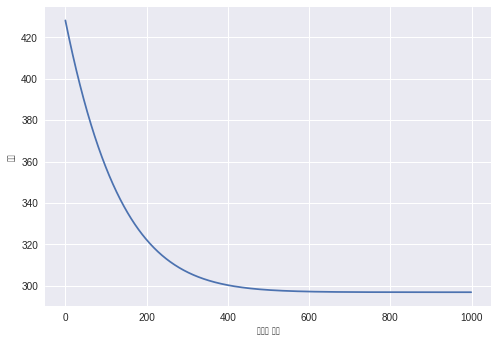

In [58]:
import matplotlib.pyplot as plt

plt.xlabel('에포크 횟수')
plt.ylabel("로스")
plt.plot(history.history['loss'])

## 모델을 사용해서 value를 예측하기 

In [60]:
model.predict([-10.0])

array([[39.3653]], dtype=float32)

## 레이어를 더 깊게 쌓아볼까? 

In [62]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[132.55878]]
Model predicts that 100 degrees Celsius is: [[132.55878]] degrees Fahrenheit
These are the l0 variables: [array([[-0.28107017, -0.85265625, -0.2060868 , -0.26292574]],
      dtype=float32), array([ 2.0741222 , -2.8900738 , -0.37817302,  2.127121  ], dtype=float32)]
These are the l1 variables: [array([[-0.45387223, -1.1363392 ,  0.42518398,  1.1119443 ],
       [ 0.74578494,  0.87426275, -0.09895006, -1.0357757 ],
       [-0.04628952, -0.83559495, -1.6656581 , -0.51497394],
       [-0.7274605 , -1.0865791 ,  0.05287317,  1.4902682 ]],
      dtype=float32), array([-2.5645392, -3.061254 ,  2.522529 ,  3.066879 ], dtype=float32)]
These are the l2 variables: [array([[-1.0524036 ],
       [-1.8958093 ],
       [ 0.71994084],
       [ 1.3050451 ]], dtype=float32), array([2.9504778], dtype=float32)]


In [0]:
import numpy as np